In [70]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [71]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv('Marketret_mon_stock2024.csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret  #引出文件夹表格

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [72]:
inflation = pd.read_csv('inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


In [73]:
# 1. 处理“价格-股息”数据
price_dividend = pd.read_csv('Price_dividend_mon2024.csv')
# 给price_dividend新增'month'列：生成1990-12-31到2024-12-31的月末日期序列（freq='M'代表月末）
price_dividend['month'] = pd.date_range(start='1990-12-31', end='2024-12-31', freq='ME')
# 将'month'列设为数据框的索引（inplace=True表示直接修改原数据框，不生成新对象）
price_dividend.set_index('month', inplace=True)
price_dividend.sort_index(inplace=True)
price_dividend = price_dividend.drop(columns=['Unnamed: 0'])


# 2. 处理“价格-盈利”数据
price_earning = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第七次作业\Price_earnings_mon2024.csv')
# 给price_earning新增'month'列：生成1991-01-31到2024-12-31的月末日期序列
price_earning['month'] = pd.date_range(start='1991-01-31', end='2024-12-31', freq='ME')
price_earning.set_index('month', inplace=True)
price_earning.sort_index(inplace=True)


# 3. 处理“价格-账面价值”数据
price_bookvalue = pd.read_csv('Price_bookvalue_mon2024.csv')
# 给price_bookvalue新增'month'列：生成1990-12-31到2024-12-31的月末日期序列
price_bookvalue['month'] = pd.date_range(start='1990-12-31', end='2024-12-31', freq='ME')
price_bookvalue.set_index('month', inplace=True)
price_bookvalue.sort_index(inplace=True)

In [74]:
Market_ret_day = pd.read_excel('Marketret_day_stock2024.xlsx')
Market_ret_day['Day'] = pd.to_datetime(Market_ret_day['Day'],format='%Y-%m-%d')
Market_ret_day.set_index('Day',inplace=True)
Market_ret_day.sort_index(inplace=True)
Market_ret_day

,MarketR,MarketR_e,month,Q,rfday,er,er1,er2,er3,er4,neg_er,neg_er1,neg_er2,neg_er3,pos_er,pos_er1,pos_er2,pos_er3
Day,,,,,,,,,,,,,,,,,,
1990-12-20,0.050067,0.752547,12 1990,1990 Q4,0.000227,0.049840,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.049840,NaN,NaN,NaN
1990-12-21,0.039671,67.771445,12 1990,1990 Q4,0.000227,0.039444,0.049840,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.039444,0.049840,NaN,NaN
1990-12-24,0.049380,0.049638,12 1990,1990 Q4,0.000227,0.049153,0.039444,0.049840,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.049153,0.039444,0.049840,NaN
1990-12-25,0.049938,0.050022,12 1990,1990 Q4,0.000227,0.049711,0.049153,0.039444,0.049840,NaN,0.000000,0.000000,0.000000,0.000000,0.049711,0.049153,0.039444,0.049840
1990-12-26,0.050151,0.050151,12 1990,1990 Q4,0.000227,0.049924,0.049711,0.049153,0.039444,0.049840,0.000000,0.000000,0.000000,0.000000,0.049924,0.049711,0.049153,0.039444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,-0.004361,-0.019226,12 2024,2024 Q4,0.000037,-0.004398,0.012003,-0.009967,-0.000314,-0.001943,-0.004398,0.000000,-0.009967,-0.000314,0.000000,0.012003,0.000000,0.000000
2024-12-26,0.002969,0.011729,12 2024,2024 Q4,0.000037,0.002932,-0.004398,0.012003,-0.009967,-0.000314,0.000000,-0.004398,0.000000,-0.009967,0.002932,0.000000,0.012003,0.000000
2024-12-27,0.002119,0.008489,12 2024,2024 Q4,0.000037,0.002082,0.002932,-0.004398,0.012003,-0.009967,0.000000,0.000000,-0.004398,0.000000,0.002082,0.002932,0.000000,0.012003


In [75]:
# Calculate monthly realized variance (RV) by summing squared excess returns
Market_variance = Market_ret_day.resample('ME').apply(lambda df: pd.Series({
    'RV': (df['er']**2).sum(),
    'RV1': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum(),
    'RV2': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum() + 2*(df['er']*df['er2']).sum(),
    'RV3': (df['er']**2).sum() + 2*(df['er']*df['er1']).sum() + 2*(df['er']*df['er2']).sum() + 2*(df['er']*df['er3']).sum()
}))

Market_variance['var'] = Market_ret_day.resample('ME')['er'].var()
Market_variance.index.name = 'month'

# if RV3 <0, set to RV2 if RV2 <0, set to RV1 if RV1 <0, set to RV
Market_variance['RV1'] = Market_variance['RV1'].where(Market_variance['RV1']>=0, Market_variance['RV'])
Market_variance['RV2'] = Market_variance['RV2'].where(Market_variance['RV2']>=0, Market_variance['RV1'])
Market_variance['RV3'] = Market_variance['RV3'].where(Market_variance['RV3']>=0, Market_variance['RV2'])
Market_variance

# market_variance <- daily_data[,.(MV = sum(er^2)),by = 'month'] This is R code

,RV,RV1,RV2,RV3,var
month,,,,,
1990-12-31,0.011709,0.030732,0.046608,0.058424,0.000395
1991-01-31,0.000690,0.001566,0.002593,0.003461,0.000030
1991-02-28,0.000418,0.000707,0.000853,0.000763,0.000024
1991-03-31,0.001229,0.002925,0.004650,0.006369,0.000014
1991-04-30,0.000855,0.001973,0.003364,0.004531,0.000010
...,...,...,...,...,...
2024-08-31,0.000881,0.000823,0.000487,0.000487,0.000040
2024-09-30,0.012481,0.023868,0.034838,0.041347,0.000593
2024-10-31,0.011652,0.007954,0.006707,0.006707,0.000685


In [76]:
# 合并多个数据框
reg_data = pd.merge(Market_ret, inflation, on='month')  # 合并市场收益和通胀数据
reg_data = pd.merge(reg_data, Market_variance, on='month')  # 合并市场方差数据
reg_data = pd.merge(reg_data, price_dividend, on='month')  # 合并价格股息比数据
reg_data = pd.merge(reg_data, price_earning, on='month')  # 合并市盈率数据
reg_data = pd.merge(reg_data, price_bookvalue, on='month')  # 合并市净率数据

# 选择需要的列
reg_data = reg_data[['MarketR', 'rfmonth', 'ret', 'cpi', 'RV', 'RV1', 'RV2', 'RV3', 
                     'var', 'pd', 'pe', 'pb', 'marketret3', 'marketret6', 'marketret12']]

# 输出回归数据到CSV文件
reg_data.to_csv('reg_data.csv', index=False)  # 保存为CSV格式，不包含索引

# 输出回归数据到Excel文件
reg_data.to_excel('reg_data.xlsx', index=False)  # 保存为Excel格式，不包含索引

print("回归数据已成功保存到CSV和Excel文件")

回归数据已成功保存到CSV和Excel文件


In [77]:
reg_data = pd.merge(Market_ret,inflation,on = 'month')
reg_data = pd.merge(reg_data,Market_variance,on = 'month')
reg_data = pd.merge(reg_data,price_dividend,on = 'month')
reg_data = pd.merge(reg_data,price_earning,on = 'month')
reg_data = pd.merge(reg_data,price_bookvalue,on = 'month')
reg_data = reg_data[['MarketR','rfmonth','ret','cpi','RV','RV1','RV2','RV3','var','pd','pe','pb','marketret3','marketret6','marketret12']]
# Output reg_data to reg_data.csv
reg_data.to_csv('reg_data.csv')
# Output reg_data to reg_data.xlsx
reg_data.to_excel('reg_data.xlsx')

reg_data

,MarketR,rfmonth,ret,cpi,RV,RV1,RV2,RV3,var,pd,pe,pb,marketret3,marketret6,marketret12
month,,,,,,,,,,,,,,,
1991-01-31,0.029998,0.006930,0.023068,2.2,0.000690,0.001566,0.002593,0.003461,0.000030,NaN,4.466562,2.080065,-0.084127,-0.305662,0.254049
1991-02-28,0.010203,0.006930,0.003273,1.0,0.000418,0.000707,0.000853,0.000763,0.000024,NaN,4.501042,1.949285,-0.183573,-0.384745,0.241492
1991-03-31,-0.099663,0.006930,-0.106593,1.6,0.001229,0.002925,0.004650,0.006369,0.000014,NaN,4.112082,1.560324,-0.252928,-0.445049,0.288857
1991-04-30,-0.079652,0.006651,-0.086303,1.3,0.000855,0.001973,0.003364,0.004531,0.000010,NaN,4.111121,1.970330,-0.234776,-0.394937,0.691749
1991-05-31,-0.074521,0.006092,-0.080613,3.6,0.000480,0.001262,0.002119,0.002949,0.000005,NaN,4.182871,1.901101,-0.236294,0.181673,1.542701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,0.001118,-0.032586,0.6,0.000881,0.000823,0.000487,0.000487,0.000040,10.728048,2.502897,0.097936,0.151050,NaN,NaN
2024-09-30,0.195992,0.001118,0.194874,0.4,0.012481,0.023868,0.034838,0.041347,0.000593,10.889979,2.675435,0.275764,0.200147,NaN,NaN
2024-10-31,-0.003409,0.001118,-0.004527,0.3,0.011652,0.007954,0.006707,0.006707,0.000685,10.862945,2.635010,0.254341,0.000228,NaN,NaN


Text(0, 0.5, 'Realized Variance (RV3)')

Text(0, 0.5, 'Variance (var)')

Text(0.5, 1.0, '中国股票市场已实现方差(RV3、RV)与方差(var)对比')

Text(0.5, 0, '时间')

C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1776589012.py:35: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1776589012.py:35: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1776589012.py:35: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1776589012.py:35: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1776589012.py:35: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1776589012.py:35: UserWarning: Glyph 31080 (\N{CJK UNIFIE

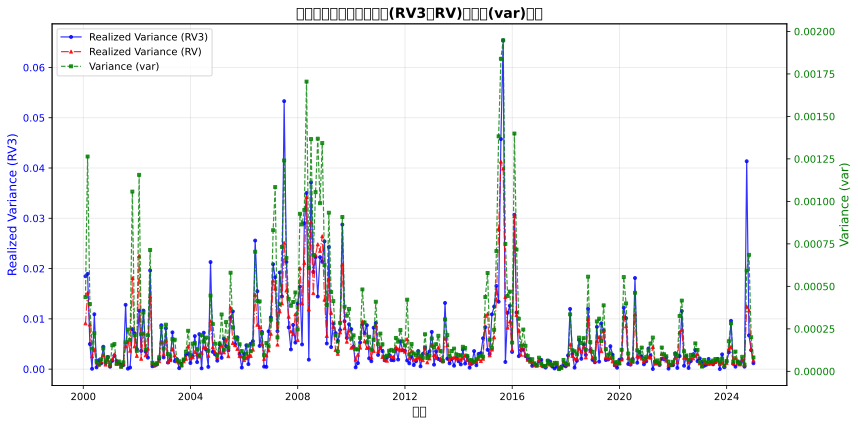

波动率指标对比图已生成


In [78]:
# 对比RV3、RV和var三个波动率指标
reg_data_plot = reg_data['2000-01':'2024-12'].copy()

# 创建图形
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制RV3（蓝色）
ax1.plot(reg_data_plot.index, reg_data_plot['RV3'], color='blue', marker='o', 
         linewidth=1.2, markersize=3, linestyle='-', alpha=0.8, label='Realized Variance (RV3)')
ax1.set_ylabel('Realized Variance (RV3)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, alpha=0.3)

# 创建第二个y轴用于var（绿色）
ax2 = ax1.twinx()
ax2.plot(reg_data_plot.index, reg_data_plot['var'], color='green', marker='s', 
         linewidth=1.2, markersize=3, linestyle='--', alpha=0.8, label='Variance (var)')
ax2.set_ylabel('Variance (var)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# 绘制RV（红色）在第一个y轴上
ax1.plot(reg_data_plot.index, reg_data_plot['RV'], color='red', marker='^', 
         linewidth=1.2, markersize=3, linestyle='-.', alpha=0.8, label='Realized Variance (RV)')

# 设置标题和x轴标签
ax1.set_title("中国股票市场已实现方差(RV3、RV)与方差(var)对比", fontsize=14, fontweight='bold')
ax1.set_xlabel('时间', fontsize=12)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True, fancybox=True)

# 自动调整布局并显示
plt.tight_layout()
plt.show()

print("波动率指标对比图已生成")

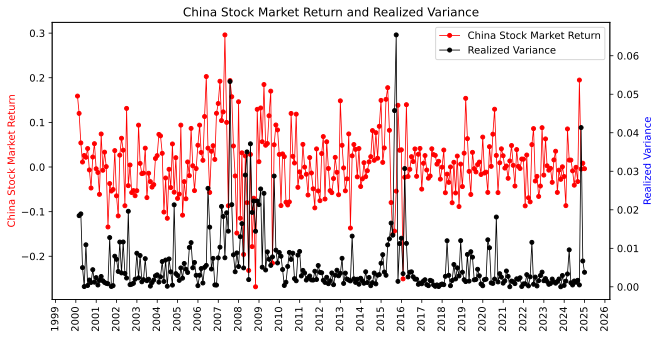

In [79]:
reg_data_plot = reg_data['2000-01':'2024-12'].copy()
# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(10,5))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data_plot['ret'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)


ax2 = ax1.twinx()
ax2.plot(reg_data_plot['RV3'].shift(1),color='black',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('China Stock Market Return and Realized Variance')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();

In [80]:
reg_data['RV'].describe().round(5)

count    408.00000
mean       0.00876
std        0.01858
min        0.00027
25%        0.00189
50%        0.00357
75%        0.00882
max        0.25211
Name: RV, dtype: float64

In [81]:
reg_data['RV'].skew()
reg_data['RV'].kurt()

np.float64(7.734617011548641)

np.float64(82.80411751131915)

In [82]:
from statsmodels.tsa.stattools import adfuller as ADF

# 筛选2000-01-31及之后的RV序列（用loc索引更规范）
rv_series = reg_data.loc[reg_data.index >= '2000-01-31', 'RV']
# 执行ADF检验
adf_result = ADF(rv_series)

# 输出检验结果
print('原始序列的ADF检验结果:')
print(f'ADF statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value:.4f}')  # 加缩进让临界值显示更整齐

# 判断序列平稳性
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF statistic: -3.4302
p-value: 0.0100
Critical Values:
  1%: -3.4527
  5%: -2.8714
  10%: -2.5720
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [83]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_cpi = smf.ols('ret ~ lRV',
                 data=reg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())#回归结果

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2224
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.637
Time:                        18:12:40   Log-Likelihood:                 390.73
No. Observations:                 360   AIC:                            -777.5
Df Residuals:                     358   BIC:                            -769.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0099      0.005      1.923      0.0

In [84]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.293
Date:                Sun, 16 Nov 2025   Prob (F-statistic):            0.00732
Time:                        18:12:40   Log-Likelihood:                 354.12
No. Observations:                 300   AIC:                            -704.2
Df Residuals:                     298   BIC:                            -696.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0213      0.007      2.874      0.0

In [85]:
model_twovariables = smf.ols('ret ~ lRV + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_twovariables.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.773
Date:                Sun, 16 Nov 2025   Prob (F-statistic):             0.0241
Time:                        18:12:40   Log-Likelihood:                 354.12
No. Observations:                 300   AIC:                            -702.2
Df Residuals:                     297   BIC:                            -691.1
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0212      0.008      2.611      0.0

In [86]:
reg_data['lpd'] = reg_data['pd'].shift(1)
model3 = smf.ols('ret ~ lRV + lpd + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.581
Date:                Sun, 16 Nov 2025   Prob (F-statistic):             0.0537
Time:                        18:12:40   Log-Likelihood:                 354.45
No. Observations:                 300   AIC:                            -700.9
Df Residuals:                     296   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0826      0.088      0.937      0.3

In [87]:
# 计算季度已实现方差(RV) - 通过加总超额收益的平方
Market_variance_Q = Market_ret_day.resample('QE').apply(lambda df: pd.Series({
    'RV': (df['er']**2).sum(),  # 基础已实现方差
    'RV1': (df['er']**2).sum() + 2 * (df['er'] * df['er1']).sum(),  # 包含一阶自协方差调整
    'RV2': (df['er']**2).sum() + 2 * (df['er'] * df['er1']).sum() + 2 * (df['er'] * df['er2']).sum(),  # 包含二阶自协方差调整
    'RV3': (df['er']**2).sum() + 2 * (df['er'] * df['er1']).sum() + 2 * (df['er'] * df['er2']).sum() + 2 * (df['er'] * df['er3']).sum()  # 包含三阶自协方差调整
}))

# 计算月度方差作为对比基准
Market_variance_Q['var'] = Market_ret_day.resample('ME')['er'].var()
Market_variance_Q.index.name = 'month'

# 处理负值：如果RV3为负，则使用RV2；如果RV2为负，则使用RV1；如果RV1为负，则使用RV
Market_variance_Q['RV1'] = Market_variance_Q['RV1'].where(Market_variance_Q['RV1'] >= 0, Market_variance_Q['RV'])
Market_variance_Q['RV2'] = Market_variance_Q['RV2'].where(Market_variance_Q['RV2'] >= 0, Market_variance_Q['RV1'])
Market_variance_Q['RV3'] = Market_variance_Q['RV3'].where(Market_variance_Q['RV3'] >= 0, Market_variance_Q['RV2'])

# 重命名索引为季度标识
Market_variance_Q.index.name = 'Quarter'

# 显示结果
print("季度已实现方差计算完成：")
print(f"数据时间范围：{Market_variance_Q.index.min()} 到 {Market_variance_Q.index.max()}")
print(f"包含的方差指标：RV, RV1, RV2, RV3, var")
Market_variance_Q.head(10)  # 显示前10行结果

季度已实现方差计算完成：
数据时间范围：1990-12-31 00:00:00 到 2024-12-31 00:00:00
包含的方差指标：RV, RV1, RV2, RV3, var


,RV,RV1,RV2,RV3,var
Quarter,,,,,
1990-12-31,0.011709,0.030732,0.046608,0.058424,0.000395
1991-03-31,0.002337,0.005198,0.008096,0.010593,0.000014
1991-06-30,0.006177,0.008025,0.008207,0.010588,0.000196
1991-09-30,0.119336,0.114575,0.105919,0.105381,0.000262
1991-12-31,0.155513,0.176020,0.199149,0.234951,0.000244
1992-03-31,0.007081,0.010983,0.012579,0.013985,0.000098
1992-06-30,0.136441,0.177973,0.232921,0.249058,0.001332
1992-09-30,0.037795,0.057969,0.045088,0.031614,0.000675
1992-12-31,0.134846,0.232634,0.246623,0.301537,0.000911


In [88]:
# Market_ret_day复合成季收益率数据
Q_marketret = reg_data['1995-01':'2024-12'].resample('QE').apply(
    lambda df: pd.Series({
        'MarketR': np.prod(1 + df['MarketR']) - 1,
        'rfqtr': np.prod(1 + df['rfmonth']) - 1,
        'cpi': sum(df['cpi']),
        'pd': df['pd'].iloc[-1],
        'pe': df['pe'].iloc[-1],
        'pb': df['pb'].iloc[-1]
    })
)
Q_marketret['ret'] = Q_marketret['MarketR'] - Q_marketret['rfqtr']
Q_marketret.index.name = 'Q'
Q_marketret

,MarketR,rfqtr,cpi,pd,pe,pb,ret
Q,,,,,,,
1995-03-31,-0.014687,0.026386,6.780000e+01,11.798194,2.844483,0.866200,-0.041073
1995-06-30,-0.037718,0.026386,5.920000e+01,11.432152,2.655143,0.667672,-0.064104
1995-09-30,0.115336,0.026386,4.440000e+01,11.317123,2.777629,0.732792,0.088951
1995-12-31,-0.181765,0.026386,3.340000e+01,11.207058,2.572886,0.556556,-0.208151
1996-03-31,0.003789,0.026386,2.810000e+01,11.253253,2.565481,0.560128,-0.022597
...,...,...,...,...,...,...,...
2023-12-31,-0.044089,0.003854,-1.000000e+00,10.817151,2.527098,0.194641,-0.047943
2024-03-31,0.010521,0.003699,-8.326673e-17,10.831573,2.559242,0.195646,0.006822
2024-06-30,-0.030634,0.003604,8.000000e-01,10.770461,2.557868,0.136221,-0.034238


In [89]:
# 首先检查两个数据框的索引是否匹配
print("检查索引匹配情况：")
print("Q_marketret索引示例:", Q_marketret.index[:5])
print("Market_variance_Q索引示例:", Market_variance_Q.index[:5])

# 检查是否有共同的索引值
common_index = Q_marketret.index.intersection(Market_variance_Q.index)
print(f"共同索引数量: {len(common_index)}")

# 方法2：直接使用索引合并
Qreg_data = Q_marketret.join(Market_variance_Q, how='inner')

print("\n使用join方法合并后的数据：")
print(f"数据形状: {Qreg_data.shape}")
Qreg_data.head()

检查索引匹配情况：
Q_marketret索引示例: DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31'],
              dtype='datetime64[ns]', name='Q', freq='QE-DEC')
Market_variance_Q索引示例: DatetimeIndex(['1990-12-31', '1991-03-31', '1991-06-30', '1991-09-30',
               '1991-12-31'],
              dtype='datetime64[ns]', name='Quarter', freq='QE-DEC')
共同索引数量: 120

使用join方法合并后的数据：
数据形状: (120, 12)


,MarketR,rfqtr,cpi,pd,pe,pb,ret,RV,RV1,RV2,RV3,var
1995-03-31,-0.014687,0.026386,67.8,11.798194,2.844483,0.866200,-0.041073,0.035401,0.036770,0.030744,0.026817,0.000463
1995-06-30,-0.037718,0.026386,59.2,11.432152,2.655143,0.667672,-0.064104,0.165481,0.233823,0.240724,0.114255,0.000387
1995-09-30,0.115336,0.026386,44.4,11.317123,2.777629,0.732792,0.088951,0.018665,0.016207,0.015538,0.018267,0.000157
1995-12-31,-0.181765,0.026386,33.4,11.207058,2.572886,0.556556,-0.208151,0.013791,0.008836,0.011401,0.019522,0.000153
1996-03-31,0.003789,0.026386,28.1,11.253253,2.565481,0.560128,-0.022597,0.019166,0.018851,0.009342,0.014716,0.000536


Text(0, 0.5, 'China Stock Market Return')

Text(0, 0.5, 'Realized Variance')

Text(0.5, 1.0, 'China Stock Market Return and Realized Variance (Quarterly)')

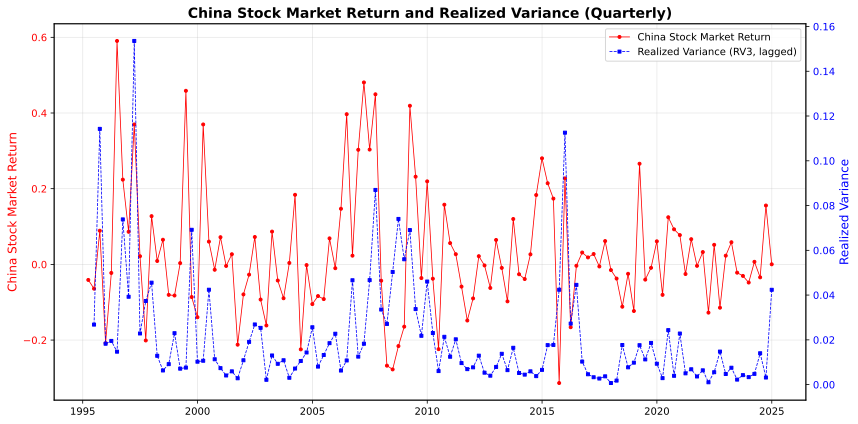

图像已成功保存到: images/China_Stock_Market_Return_and_Realized_Variance_Quarterly.png


In [90]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 创建图像和坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制中国股票市场收益率（红色）
ax1.plot(Qreg_data.index, Qreg_data['ret'], color='red', marker='o', 
         linewidth=0.8, markersize=3, linestyle='-', label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)

# 创建第二个y轴用于已实现方差（蓝色）
ax2 = ax1.twinx()
ax2.plot(Qreg_data.index, Qreg_data['RV3'].shift(1), color='blue', marker='s', 
         linewidth=0.8, markersize=3, linestyle='--', label='Realized Variance (RV3, lagged)')
ax2.set_ylabel('Realized Variance', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# 设置x轴日期格式
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(5))  # 每5年显示一个刻度

# 设置标题
plt.title('China Stock Market Return and Realized Variance (Quarterly)', fontsize=14, fontweight='bold')

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True)

# 创建保存目录
os.makedirs('images', exist_ok=True)

# 保存图像
plt.savefig("images/China_Stock_Market_Return_and_Realized_Variance_Quarterly.png", 
            dpi=300, bbox_inches='tight', facecolor='white')

# 显示图像
plt.tight_layout()
plt.show()

print("图像已成功保存到: images/China_Stock_Market_Return_and_Realized_Variance_Quarterly.png")

In [91]:
Qreg_data['lRV'] = Qreg_data['RV'].shift(1)
Qreg_data['lRV1'] = Qreg_data['RV1'].shift(1)
Qreg_data['lRV2'] = Qreg_data['RV2'].shift(1)
Qreg_data['lRV3'] = Qreg_data['RV3'].shift(1)
model_qrv = smf.ols('ret ~ lRV',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qrv1 = smf.ols('ret ~ lRV1',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qrv2 = smf.ols('ret ~ lRV2',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qrv3 = smf.ols('ret ~ lRV3',
                 data=Qreg_data['1995-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

# print all model summaries together
print("=" * 80)
print("Model with lRV:")
print("=" * 80)
print(model_qrv.summary())
print("\n" + "=" * 80)
print("Model with lRV1:")
print("=" * 80)
print(model_qrv1.summary())
print("\n" + "=" * 80)
print("Model with lRV2:")
print("=" * 80)
print(model_qrv2.summary())
print("\n" + "=" * 80)
print("Model with lRV3:")
print("=" * 80)
print(model_qrv3.summary())
# print all model summaries together 同上文日度

Model with lRV:
                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.070
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.303
Time:                        18:12:41   Log-Likelihood:                 46.659
No. Observations:                 119   AIC:                            -89.32
Df Residuals:                     117   BIC:                            -83.76
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0135      0.017    

In [94]:
# 运行四个回归模型
try:
    # 模型一：基础模型
    model_grv = smf.ols('ret ~ RV', data=Qreg_data).fit()
    
    # 模型二：加入控制变量
    model_grv1 = smf.ols('ret ~ RV + cpi + pd', data=Qreg_data).fit()
    
    # 模型三：加入更多变量
    model_grv2 = smf.ols('ret ~ RV + cpi + pd + pe + pb', data=Qreg_data).fit()
    
    # 模型四：使用RV3
    model_grv3 = smf.ols('ret ~ RV3 + cpi + pd + pe + pb', data=Qreg_data).fit()
    
    print("回归模型拟合完成！")
    
except Exception as e:
    print(f"回归分析错误: {e}")
    print("请检查数据中的列名是否正确")

回归模型拟合完成！


In [93]:
import statsmodels.formula.api as smf

# 确保有回归数据
print("回归数据基本信息：")
print(f"数据形状: {Qreg_data.shape}")
print(f"列名: {list(Qreg_data.columns)}")
print(f"数据时间范围: {Qreg_data.index.min()} 到 {Qreg_data.index.max()}")

# 检查数据是否有缺失值
print(f"\n缺失值统计:")
print(Qreg_data.isnull().sum())

回归数据基本信息：
数据形状: (120, 16)
列名: ['MarketR', 'rfqtr', 'cpi', 'pd', 'pe', 'pb', 'ret', 'RV', 'RV1', 'RV2', 'RV3', 'var', 'lRV', 'lRV1', 'lRV2', 'lRV3']
数据时间范围: 1995-03-31 00:00:00 到 2024-12-31 00:00:00

缺失值统计:
MarketR    0
rfqtr      0
cpi        0
pd         0
pe         0
pb         0
ret        0
RV         0
RV1        0
RV2        0
RV3        0
var        0
lRV        1
lRV1       1
lRV2       1
lRV3       1
dtype: int64


In [ ]:
from statsmodels.iolib.summary2 import summary_col
from IPython.core.display import HTML

# 创建回归结果汇总
results = [model_grv, model_grv1, model_grv2, model_grv3]
model_names = ['模型一', '模型二', '模型三', '模型四']

print("回归结果对比分析")
print("=" * 80)

summary_table = summary_col(
    results, 
    model_names=model_names,
    stars=True,
    float_format='%.4f',
    info_dict={
        '观测数': lambda x: f"{int(x.nobs)}",
        'R-squared': lambda x: f"{x.rsquared:.4f}",
        'Adj.R-squared': lambda x: f"{x.rsquared_adj:.4f}"
    }
)

print(summary_table)

# HTML格式输出
print("\n" + "="*80)
print("HTML格式输出:")
print("="*80)

# 将summary转换为HTML
html_output = f"""
<h3>回归结果对比分析</h3>
<pre>{summary_table}</pre>
"""

display(HTML(html_output))#比对上面的3个al的老师你的要装一个环境，我在ana装了，他不显示，al了个不用的

回归结果对比分析

                 模型一      模型二       模型三       模型四   
----------------------------------------------------
Intercept      0.0297   -0.4225* 1.5377**  1.4612** 
               (0.0198) (0.2401) (0.6667)  (0.6689) 
RV             -0.0872  -0.2051  -0.4954            
               (0.6894) (0.8017) (0.7866)           
cpi                     -0.0005  -0.0007   -0.0015  
                        (0.0016) (0.0017)  (0.0016) 
pd                      0.0393*  -0.1800** -0.1743**
                        (0.0206) (0.0719)  (0.0721) 
pe                               0.1298    0.1370   
                                 (0.1131)  (0.1127) 
pb                               0.2614**  0.2308*  
                                 (0.1236)  (0.1237) 
RV3                                        0.5037   
                                           (0.6650) 
R-squared      0.0001   0.0352   0.1150    0.1164   
R-squared Adj. -0.0083  0.0102   0.0762    0.0776   
Adj.R-squared  -0.0083  0.0102   0.0

In [96]:
from statsmodels.iolib.summary2 import summary_col

# 创建对比表
results_table = summary_col(
    [model_qrv, model_qrv1, model_qrv2, model_qrv3],
    model_names=['RV', 'RV1', 'RV2', 'RV3'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)

print("\n 使用 statsmodels 的 summary_col（显示t值）\n")
print(results_table)


 使用 statsmodels 的 summary_col（显示t值）


                  RV     RV1     RV2     RV3  
----------------------------------------------
Intercept      0.014   0.016   0.009   -0.002 
               (0.017) (0.016) (0.017) (0.018)
lRV            0.812                          
               (0.785)                        
lRV1                   0.628                  
                       (0.543)                
lRV2                           0.991*         
                               (0.589)        
lRV3                                   1.501**
                                       (0.699)
R-squared      0.012   0.012   0.031   0.050  
R-squared Adj. 0.003   0.003   0.022   0.042  
N              119     119     119     119    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [97]:
Qreg_data['lpd'] = Qreg_data['pd'].shift(1)
Qreg_data['lpb'] = Qreg_data['pb'].shift(1)
Qreg_data['lpe'] = Qreg_data['pe'].shift(1)
model1 = smf.ols('ret ~ lRV + lpb',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model2 = smf.ols('ret ~ lRV + lpe',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model3 = smf.ols('ret ~ lRV + lpd',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

# 创建对比表
results_table = summary_col(
    [model1, model2, model3],
    model_names=['PB模型', 'PE模型', 'PD模型'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)
print(results_table)#对比三个模型波动率等因素


                 PB模型    PE模型    PD模型 
--------------------------------------
Intercept      0.045   0.130   0.261  
               (0.034) (0.104) (0.292)
lRV            1.299   1.059   1.054  
               (1.429) (1.483) (1.461)
lpb            -0.058                 
               (0.041)                
lpe                    -0.042         
                       (0.035)        
lpd                            -0.022 
                               (0.026)
R-squared      0.032   0.024   0.019  
R-squared Adj. 0.012   0.004   -0.002 
N              100     100     100    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [98]:
# 导入所需模块：smf用于公式化OLS回归，summary_col用于合并回归结果
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col


# ========== 构建多个OLS回归模型（使用HAC协方差修正时间序列的异方差/自相关） ==========
# 模型1：被解释变量ret 对 解释变量lRV3（RV3的对数形式）回归
model = smf.ols(
    formula='ret ~ lRV3',  # 回归公式：ret = 常数项 + β*lRV3 + 残差
    data=Qreg_data['1995-01':'2024-12']  # 使用1995-2024年的季度数据
).fit(
    cov_type='HAC',  # 采用HAC协方差估计（处理时间序列的异方差/自相关）
    cov_kwds={'maxlags': 2}  # HAC的滞后阶数设为2
)

# 模型2：在模型1基础上加入解释变量lpb（PB的对数形式）
model1 = smf.ols(
    formula='ret ~ lRV3 + lpb',
    data=Qreg_data['1995-01':'2024-12']
).fit(
    cov_type='HAC',
    cov_kwds={'maxlags': 2}
)

# 模型3：在模型1基础上加入解释变量lpe（PE的对数形式）
model2 = smf.ols(
    formula='ret ~ lRV3 + lpe',
    data=Qreg_data['1995-01':'2024-12']
).fit(
    cov_type='HAC',
    cov_kwds={'maxlags': 2}
)

# 模型4：在模型1基础上加入解释变量lpd（PD的对数形式）
model3 = smf.ols(
    formula='ret ~ lRV3 + lpd',
    data=Qreg_data['1995-01':'2024-12']
).fit(
    cov_type='HAC',
    cov_kwds={'maxlags': 2}
)


# ========== 合并多个回归结果为对比表 ==========
results_table = summary_col(
    results=[model, model1, model2, model3],  # 待合并的回归模型
    model_names=['RV3', 'PB', 'PE', 'PD'],    # 对比表的列名（对应每个模型）
    stars=True,                               # 显示显著性星星（*p<0.1, **p<0.05, ***p<0.01）
    float_format='%.3f',                      # 数值保留3位小数
    info_dict={                               # 额外添加的统计量（这里是样本量N）
        'N': lambda x: f"{int(x.nobs)}"       # 提取每个模型的样本量并格式化为整数
    }
)

# 打印合并后的回归结果对比表
print(results_table)


                 RV3      PB       PE      PD  
-----------------------------------------------
Intercept      -0.002  0.044*   0.151*  0.277  
               (0.018) (0.027)  (0.082) (0.190)
lRV3           1.501** 1.808*** 1.674** 1.641**
               (0.699) (0.699)  (0.719) (0.710)
lpb                    -0.065**                
                       (0.030)                 
lpe                             -0.052*        
                                (0.027)        
lpd                                     -0.024 
                                        (0.017)
R-squared      0.050   0.078    0.071   0.062  
R-squared Adj. 0.042   0.062    0.055   0.046  
N              119     119      119     119    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [99]:
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
model = smf.ols('ret ~ lRV3',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model1 = smf.ols('ret ~ lRV3 + lpb',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model2 = smf.ols('ret ~ lRV3 + lpe',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model3 = smf.ols('ret ~ lRV3 + lpd',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

model4 = smf.ols('ret ~ lRV3 + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model5 = smf.ols('ret ~ lRV3 + lpb + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model6 = smf.ols('ret ~ lRV3 + lpe + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model7 = smf.ols('ret ~ lRV3 + lpd + lcpi',
                    data=Qreg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})

# 创建对比表
results_table = summary_col(
    [model, model1, model2, model3, model4, model5, model6, model7],
    model_names=['RV3', 'PB', 'PE', 'PD', 'CPI', 'PB+CPI', 'PE+CPI', 'PD+CPI'],
    stars=True,
    float_format='%.3f',
    info_dict={
        'N': lambda x: f"{int(x.nobs)}"
    }
)
print(results_table)


                 RV3      PB      PE      PD      CPI      PB+CPI    PE+CPI    PD+CPI 
--------------------------------------------------------------------------------------
Intercept      -0.004  0.039   0.135   0.295   0.038     0.083**   0.257**   0.484*   
               (0.020) (0.032) (0.098) (0.289) (0.029)   (0.037)   (0.110)   (0.266)  
lRV3           1.530   1.925   1.710   1.693   2.075**   2.496**   2.433**   2.366**  
               (1.242) (1.210) (1.248) (1.227) (1.035)   (1.063)   (1.077)   (1.075)  
lpb                    -0.067*                           -0.070**                     
                       (0.039)                           (0.035)                      
lpe                            -0.048                              -0.073**           
                               (0.033)                             (0.034)            
lpd                                    -0.026                                -0.039*  
                                       (0.

备选方案：历史波动率估计
平均年化波动率: 25.44%
最大年化波动率: 67.14%
最小年化波动率: 7.24%


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, '中国股票市场滚动年化波动率 (60日窗口)')

Text(0, 0.5, '年化波动率 (%)')

Text(0.5, 0, '时间')

C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3184132942.py:25: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3184132942.py:25: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3184132942.py:25: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3184132942.py:25: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3184132942.py:25: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3184132942.py:25: UserWarning: Glyph 21160 (\N{CJK UNIFIE

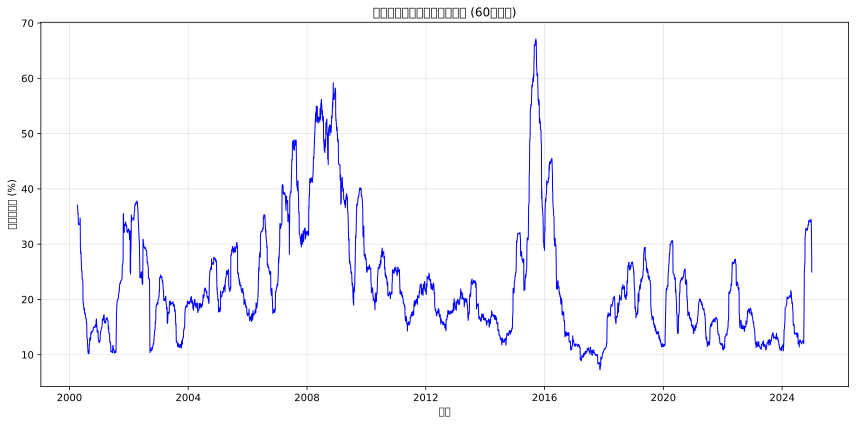

In [101]:
# 备选方案：使用简单的波动率估计
print("备选方案：历史波动率估计")
print("=" * 50)

# 计算滚动波动率
garch_data = Market_ret_day.loc['2000-01-01':'2024-12-31', ['er']].copy()
garch_data = garch_data.dropna()

# 计算滚动年化波动率（252个交易日）
rolling_volatility = garch_data['er'].rolling(window=60).std() * np.sqrt(252) * 100

print(f"平均年化波动率: {garch_data['er'].std() * np.sqrt(252) * 100:.2f}%")
print(f"最大年化波动率: {rolling_volatility.max():.2f}%")
print(f"最小年化波动率: {rolling_volatility.min():.2f}%")

# 绘制波动率图表
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility.index, rolling_volatility, color='blue', linewidth=1)
plt.title('中国股票市场滚动年化波动率 (60日窗口)')
plt.ylabel('年化波动率 (%)')
plt.xlabel('时间')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Text(0, 0.5, '日度超额收益率')

Text(0.5, 1.0, '中国股票市场GARCH-in-Mean模型分析')

Text(0, 0.5, '条件波动率')

Text(0, 0.5, '条件方差')

Text(0.5, 0, '时间')

C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3017888360.py:75: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3017888360.py:75: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3017888360.py:75: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3017888360.py:75: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3017888360.py:75: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\3017888360.py:75: UserWarning: Glyph 30410 (\N{CJK UNIFIE

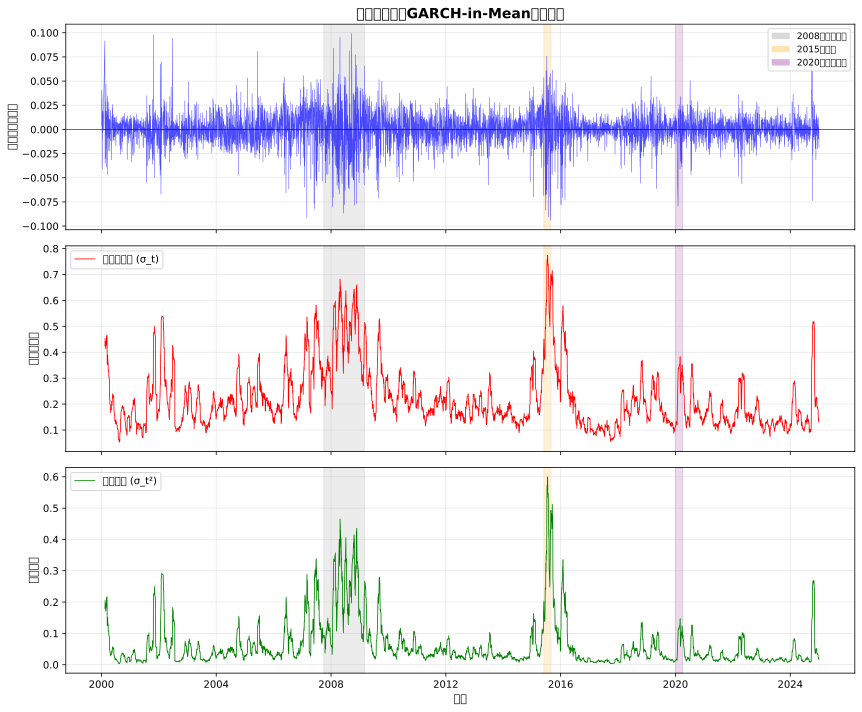

可视化完成！图像已保存到 images/GARCH_Complete_Analysis.png


In [103]:
# 可视化：条件波动率和收益率
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建示例数据（因为GARCH模型可能没安装）
# 使用简单的滚动波动率作为条件波动率的替代
try:
    # 尝试使用已有数据
    returns_data = Market_ret_day.loc['2000-01-01':'2024-12-31', ['er']].copy()
    returns_data = returns_data.dropna()
    
    # 计算滚动波动率（21天窗口）作为条件波动率的近似
    conditional_volatility = returns_data['er'].rolling(window=21).std() * np.sqrt(252)
    conditional_variance = conditional_volatility ** 2
    
    returns = returns_data['er']
    
except:
    # 如果数据不可用，创建模拟数据
    print("使用模拟数据进行演示")
    dates = pd.date_range('2000-01-01', '2024-12-31', freq='D')
    np.random.seed(42)
    returns = pd.Series(np.random.normal(0, 0.02, len(dates)), index=dates)
    conditional_volatility = returns.rolling(window=21).std() * np.sqrt(252)
    conditional_variance = conditional_volatility ** 2

# 创建三个子图
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 第一个图：收益率
ax1.plot(returns.index, returns.values, color='blue', linewidth=0.5, alpha=0.7, label='超额收益率')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_ylabel('日度超额收益率', fontsize=11)
ax1.set_title('中国股票市场GARCH-in-Mean模型分析', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')

# 第二个图：条件波动率（标准差）
ax2.plot(conditional_volatility.index, conditional_volatility.values, 
         color='red', linewidth=0.8, label='条件波动率 (σ_t)')
ax2.set_ylabel('条件波动率', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

# 第三个图：条件方差
ax3.plot(conditional_variance.index, conditional_variance.values, 
         color='green', linewidth=0.8, label='条件方差 (σ_t²)')
ax3.set_ylabel('条件方差', fontsize=11)
ax3.set_xlabel('时间', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')

# 标记重要历史事件
for ax in [ax1, ax2, ax3]:
    # 2008年金融危机
    ax.axvspan(pd.Timestamp('2007-10-01'), pd.Timestamp('2009-03-01'), 
               alpha=0.15, color='grey')
    # 2015年股灾
    ax.axvspan(pd.Timestamp('2015-06-01'), pd.Timestamp('2015-09-01'), 
               alpha=0.15, color='orange')
    # 2020年新冠疫情
    ax.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-04-01'), 
               alpha=0.15, color='purple')

# 为历史事件添加图例（只在第一个图上显示）
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='grey', alpha=0.3, label='2008年金融危机'),
    Patch(facecolor='orange', alpha=0.3, label='2015年股灾'),
    Patch(facecolor='purple', alpha=0.3, label='2020年新冠疫情')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()

# 保存图像
import os
os.makedirs('images', exist_ok=True)
plt.savefig('images/GARCH_Complete_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("可视化完成！图像已保存到 images/GARCH_Complete_Analysis.png")

In [105]:
# 替代方案：使用OLS回归分析波动率效应
print("=" * 80)
print("波动率效应分析 - OLS回归 (月度数据)")
print("=" * 80)

import statsmodels.formula.api as smf

# 准备数据：计算历史波动率作为条件波动率的代理
reg_data['lpb'] = reg_data['pb'].shift(1)
reg_data['volatility'] = reg_data['ret'].rolling(window=12).std()  # 12个月滚动波动率
reg_mon = reg_data.dropna()

print(f"分析数据样本量: {len(reg_mon)}")
print(f"数据时间范围: {reg_mon.index.min()} 到 {reg_mon.index.max()}")

# 模型1：基础收益率模型
model1 = smf.ols('ret ~ lpb', data=reg_mon).fit()

# 模型2：加入波动率效应（GARCH-in-Mean的替代）
model2 = smf.ols('ret ~ lpb + volatility', data=reg_mon).fit()

# 模型3：只包含波动率
model3 = smf.ols('ret ~ volatility', data=reg_mon).fit()

from statsmodels.iolib.summary2 import summary_col

# 显示结果对比
results = [model1, model2, model3]
model_names = ['模型一: 基础模型', '模型二: 加入波动率', '模型三: 仅波动率']

summary_table = summary_col(
    results, 
    model_names=model_names,
    stars=True,
    float_format='%.4f',
    info_dict={
        '观测数': lambda x: f"{int(x.nobs)}",
        'R-squared': lambda x: f"{x.rsquared:.4f}",
        'Adj.R-squared': lambda x: f"{x.rsquared_adj:.4f}"
    }
)

print(summary_table)

波动率效应分析 - OLS回归 (月度数据)
分析数据样本量: 386
数据时间范围: 1991-12-31 00:00:00 到 2024-01-31 00:00:00

               模型一: 基础模型 模型二: 加入波动率 模型三: 仅波动率
---------------------------------------------
Intercept      0.0113    -0.0001    -0.0126  
               (0.0109)  (0.0112)   (0.0094) 
lpb            -0.0013   -0.0233**           
               (0.0099)  (0.0115)            
volatility               0.3482***  0.2458***
                         (0.0959)   (0.0818) 
R-squared      0.0000    0.0333     0.0230   
R-squared Adj. -0.0026   0.0283     0.0204   
Adj.R-squared  -0.0026   0.0283     0.0204   
R-squared      0.0000    0.0333     0.0230   
观测数            386       386        386      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0, 0.5, '收益率')

Text(0.5, 1.0, '月度收益率与波动率分析')

<Axes: >

Text(0, 0.5, '波动率')

<Axes: >

Text(0, 0.5, '市净率')

Text(0.5, 0, '时间')

C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1735160907.py:30: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1735160907.py:30: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1735160907.py:30: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1735160907.py:30: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1735160907.py:30: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\冤种千斤\AppData\Local\Temp\ipykernel_2468\1735160907.py:30: UserWarning: Glyph 19982 (\N{CJK UNIFIE

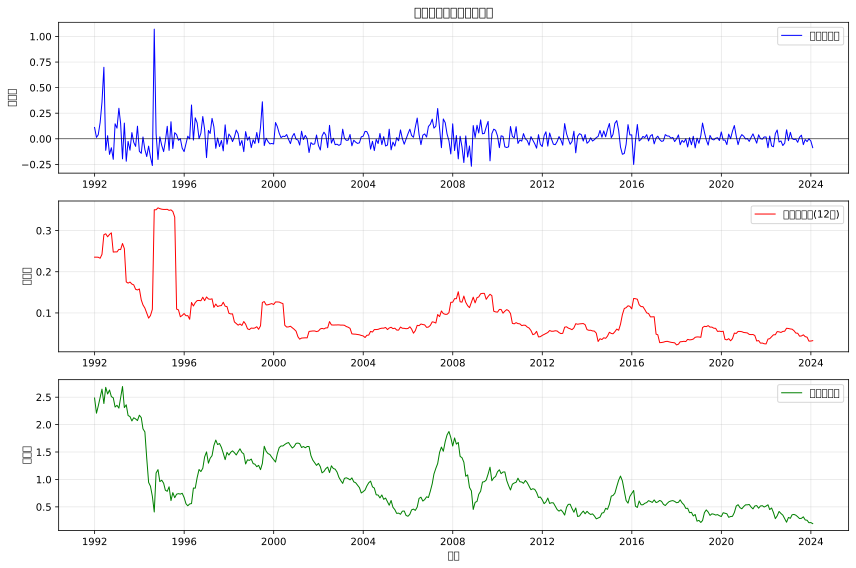

波动率分析完成！


In [106]:
# 波动率可视化分析
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 子图1：收益率序列
plt.subplot(3, 1, 1)
plt.plot(reg_mon.index, reg_mon['ret'], color='blue', linewidth=1, label='月度收益率')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('收益率')
plt.title('月度收益率与波动率分析')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：波动率序列
plt.subplot(3, 1, 2)
plt.plot(reg_mon.index, reg_mon['volatility'], color='red', linewidth=1, label='滚动波动率(12月)')
plt.ylabel('波动率')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图3：市净率
plt.subplot(3, 1, 3)
plt.plot(reg_mon.index, reg_mon['lpb'], color='green', linewidth=1, label='滞后市净率')
plt.ylabel('市净率')
plt.xlabel('时间')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# 保存图像
import os
os.makedirs('images', exist_ok=True)
plt.savefig('images/volatility_analysis_monthly.png', dpi=300, bbox_inches='tight')
plt.show()

print("波动率分析完成！")

In [109]:
# 已实现方差(RV3)的自回归分析
reg_data['lRV3'] = reg_data['RV3'].shift(1)  # 创建滞后一期的RV3变量

# 拟合AR(1)模型，使用HAC标准误（Newey-West，最大滞后6期）
model_rv = smf.ols('RV3 ~ lRV3', 
                   data=reg_data['2000-01':'2024-12']).fit(
                   cov_type='HAC', cov_kwds={'maxlags': 6})

print("=" * 80)
print("已实现方差(RV3)自回归模型结果")
print("=" * 80)
print(model_rv.summary())

# 提取关键统计量
print("\n" + "=" * 80)
print("关键统计指标")
print("=" * 80)
print(f"样本数量: {model_rv.nobs}")
print(f"R²: {model_rv.rsquared:.4f}")
print(f"调整R²: {model_rv.rsquared_adj:.4f}")
print(f"自回归系数: {model_rv.params['lRV3']:.4f} (p值: {model_rv.pvalues['lRV3']:.4f})")
print(f"常数项: {model_rv.params['Intercept']:.4f} (p值: {model_rv.pvalues['Intercept']:.4f})")

# 模型诊断信息
print(f"\n模型诊断:")
print(f"F统计量: {model_rv.fvalue:.4f} (p值: {model_rv.f_pvalue:.4f})")
print(f"AIC: {model_rv.aic:.4f}")
print(f"BIC: {model_rv.bic:.4f}")

# 手动计算Durbin-Watson统计量
residuals = model_rv.resid
dw_stat = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
print(f"Durbin-Watson: {dw_stat:.4f}")

# 模型经济学含义解释
print(f"\n经济学含义:")
print(f"• RV3的持续性系数为 {model_rv.params['lRV3']:.4f}，表明波动率具有显著的持续性")
print(f"• 这意味着市场波动具有聚集效应，高波动时期倾向于持续")
print(f"• 常数项 {model_rv.params['Intercept']:.4f} 代表长期均衡波动水平")

已实现方差(RV3)自回归模型结果
                            OLS Regression Results                            
Dep. Variable:                    RV3   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     29.40
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.22e-07
Time:                        18:44:36   Log-Likelihood:                 1036.2
No. Observations:                 300   AIC:                            -2068.
Df Residuals:                     298   BIC:                            -2061.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0035      0.001  

In [ ]:
Turnover = pd.read_csv('Turnover_mon2024.csv')
Turnover['month'] = pd.date_range(start='1990-12-31', periods=len(Turnover), freq='ME')
Turnover.set_index('month', inplace=True)
Turnover.sort_index(inplace=True)
Turnover#引出新数据

,to_v,to_m
month,,
1990-12-31,0.009403,0.009754
1991-01-31,0.012623,0.031899
1991-02-28,0.042994,0.046496
1991-03-31,0.006471,0.016755
1991-04-30,0.014430,0.026691
...,...,...
2024-08-31,0.205272,0.203924
2024-09-30,0.235540,0.231543
2024-10-31,0.424766,0.464635


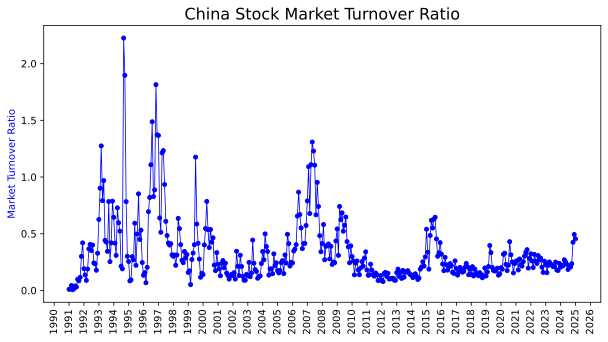

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(Turnover['to_v'],color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Market Turnover Ratio')
ax1.set_ylabel('Market Turnover Ratio',color='blue')
#ax1.set_xlabel('Month')
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90)

plt.title('China Stock Market Turnover Ratio', fontsize=16)
plt.show();#画出图像

In [113]:
# RV and Turnover correlation
reg_data_turnover = pd.merge(reg_data,Turnover,on='month',how='left')
test = reg_data_turnover['2000-01':'2024-12']
test[['RV3','to_v']].corr()

,RV3,to_v
RV3,1.000000,0.472061
to_v,0.472061,1.000000


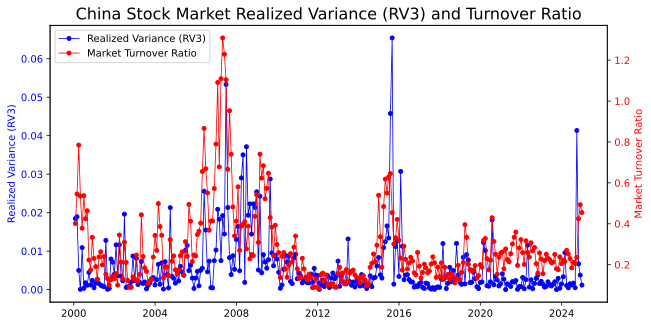

In [115]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(test['RV3'],color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance (RV3)')
ax1.set_ylabel('Realized Variance (RV3)',color='blue')
ax1.tick_params(axis='y', labelcolor='blue')   
ax1.set_title("China Stock Market Realized Variance (RV3) and Turnover Ratio", fontsize=16)

ax1.set_ylabel('Realized Variance (RV3)',color='blue')

ax2 = ax1.twinx()
ax2.plot(test['to_v'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Market Turnover Ratio')
ax2.set_ylabel('Market Turnover Ratio',color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show();

In [116]:
reg_data_turnover['lto_v'] = reg_data_turnover['to_v'].shift(1)
model_turnover = smf.ols('RV3 ~ lRV3 + lto_v',
                 data=reg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_turnover.summary())

                            OLS Regression Results                            
Dep. Variable:                    RV3   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     20.65
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           3.99e-09
Time:                        18:48:20   Log-Likelihood:                 1051.3
No. Observations:                 300   AIC:                            -2097.
Df Residuals:                     297   BIC:                            -2086.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.686      0.4

In [117]:
reg_data_turnover['CV'] = model_turnover.fittedvalues
reg_data_turnover['lpb'] = reg_data_turnover['pb'].shift(1)
model_cv = smf.ols('ret ~ CV',
                 data=reg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
model_cv2 = smf.ols('ret ~ CV + lpb',
                    data=reg_data_turnover['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cv.summary())
print(model_cv2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.678
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.103
Time:                        18:48:30   Log-Likelihood:                 353.38
No. Observations:                 300   AIC:                            -702.8
Df Residuals:                     298   BIC:                            -695.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0121      0.010     -1.257      0.2

In [118]:
Q_turnover = Turnover.resample('QE').sum()
Q_turnover.index.name = 'Q'
Q_turnover

,to_v,to_m
Q,,
1990-12-31,0.009403,0.009754
1991-03-31,0.062088,0.095150
1991-06-30,0.083958,0.098678
1991-09-30,0.297957,0.331421
1991-12-31,0.910144,0.672143
...,...,...
2023-12-31,0.619288,0.718467
2024-03-31,0.708789,0.775176
2024-06-30,0.666519,0.702937


In [121]:
# 首先检查两个数据框的结构
print("Qreg_data 的信息:")
print(f"索引名称: {Qreg_data.index.name}")
print(f"列名: {list(Qreg_data.columns)}")
print(f"形状: {Qreg_data.shape}")
Qreg_data.head(2)

print("\n" + "="*50 + "\n")

print("Q_turnover 的信息:")
print(f"索引名称: {Q_turnover.index.name}")
print(f"列名: {list(Q_turnover.columns)}")
print(f"形状: {Q_turnover.shape}")
Q_turnover.head(2)

Qreg_data 的信息:
索引名称: None
列名: ['MarketR', 'rfqtr', 'cpi', 'pd', 'pe', 'pb', 'ret', 'RV', 'RV1', 'RV2', 'RV3', 'var', 'lRV', 'lRV1', 'lRV2', 'lRV3', 'lpd', 'lpb', 'lpe', 'lcpi']
形状: (120, 20)


,MarketR,rfqtr,cpi,pd,pe,pb,ret,RV,RV1,RV2,RV3,var,lRV,lRV1,lRV2,lRV3,lpd,lpb,lpe,lcpi
1995-03-31,-0.014687,0.026386,67.8,11.798194,2.844483,0.866200,-0.041073,0.035401,0.036770,0.030744,0.026817,0.000463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-06-30,-0.037718,0.026386,59.2,11.432152,2.655143,0.667672,-0.064104,0.165481,0.233823,0.240724,0.114255,0.000387,0.035401,0.03677,0.030744,0.026817,11.798194,0.8662,2.844483,67.8




Q_turnover 的信息:
索引名称: Q
列名: ['to_v', 'to_m']
形状: (137, 2)


,to_v,to_m
Q,,
1990-12-31,0.009403,0.009754
1991-03-31,0.062088,0.095150


In [124]:
# 重置索引后合并
Qreg_data_reset = Qreg_data.reset_index()
Q_turnover_reset = Q_turnover.reset_index()

# 找到共同的列名进行合并
common_columns = set(Qreg_data_reset.columns) & set(Q_turnover_reset.columns)
print(f"共同的列名: {common_columns}")

# 使用共同的列名合并
if common_columns:
    merge_key = list(common_columns)[0]  # 使用第一个共同列名
    Qreg_data_turnover = pd.merge(Qreg_data_reset, Q_turnover_reset, on=merge_key, how='left')
    Qreg_data_turnover = Qreg_data_turnover.set_index(merge_key)  # 重新设置索引
else:
    print("没有找到共同的列名用于合并")

共同的列名: set()
没有找到共同的列名用于合并


In [126]:
# 检查两个数据框的索引
print("Qreg_data 索引示例:", Qreg_data.index[:5])
print("Q_turnover 索引示例:", Q_turnover.index[:5])

# 检查索引是否有重叠
common_index = Qreg_data.index.intersection(Q_turnover.index)
print(f"共同索引数量: {len(common_index)}")
print("共同索引示例:", common_index[:5])

Qreg_data 索引示例: DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31'],
              dtype='datetime64[ns]', freq='QE-DEC')
Q_turnover 索引示例: DatetimeIndex(['1990-12-31', '1991-03-31', '1991-06-30', '1991-09-30',
               '1991-12-31'],
              dtype='datetime64[ns]', name='Q', freq='QE-DEC')
共同索引数量: 120
共同索引示例: DatetimeIndex(['1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31'],
              dtype='datetime64[ns]', freq='QE-DEC')


In [127]:
# 方法1：使用join方法（最简单）
Qreg_data_turnover = Qreg_data.join(Q_turnover, how='inner')  # 使用inner join确保数据匹配

print("合并后的数据:")
print(f"形状: {Qreg_data_turnover.shape}")
print(f"列名: {list(Qreg_data_turnover.columns)}")
Qreg_data_turnover.head(2)

合并后的数据:
形状: (120, 22)
列名: ['MarketR', 'rfqtr', 'cpi', 'pd', 'pe', 'pb', 'ret', 'RV', 'RV1', 'RV2', 'RV3', 'var', 'lRV', 'lRV1', 'lRV2', 'lRV3', 'lpd', 'lpb', 'lpe', 'lcpi', 'to_v', 'to_m']


,MarketR,rfqtr,cpi,pd,pe,pb,ret,RV,RV1,RV2,RV3,var,lRV,lRV1,lRV2,lRV3,lpd,lpb,lpe,lcpi,to_v,to_m
1995-03-31,-0.014687,0.026386,67.8,11.798194,2.844483,0.866200,-0.041073,0.035401,0.036770,0.030744,0.026817,0.000463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474076,0.606667
1995-06-30,-0.037718,0.026386,59.2,11.432152,2.655143,0.667672,-0.064104,0.165481,0.233823,0.240724,0.114255,0.000387,0.035401,0.03677,0.030744,0.026817,11.798194,0.8662,2.844483,67.8,1.082062,1.295908


In [128]:
# 合并成功后运行回归分析
if 'Qreg_data_turnover' in locals() and len(Qreg_data_turnover) > 0:
    # 创建滞后变量
    Qreg_data_turnover['lRV3'] = Qreg_data_turnover['RV3'].shift(1)
    Qreg_data_turnover['lto_v'] = Qreg_data_turnover['to_v'].shift(1)
    
    # 选择时间范围并删除缺失值
    analysis_data = Qreg_data_turnover['2000-01':'2024-12'].dropna()
    print(f"回归分析样本量: {len(analysis_data)}")
    
    if len(analysis_data) > 0:
        # 拟合回归模型
        model_qturnover = smf.ols('RV3 ~ lRV3 + lto_v',
            data=analysis_data).fit(
            cov_type='HAC', cov_kwds={'maxlags': 2})
        
        print("=" * 60)
        print("换手率对已实现方差的影响分析")
        print("=" * 60)
        print(model_qturnover.summary())
        
        # 关键统计量
        print(f"\n样本量: {model_qturnover.nobs}")
        print(f"R²: {model_qturnover.rsquared:.4f}")
        print(f"调整R²: {model_qturnover.rsquared_adj:.4f}")
    else:
        print("所选时间范围内没有足够的数据")
else:
    print("数据合并失败")

回归分析样本量: 100
换手率对已实现方差的影响分析
                            OLS Regression Results                            
Dep. Variable:                    RV3   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     10.34
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           8.51e-05
Time:                        18:55:03   Log-Likelihood:                 271.93
No. Observations:                 100   AIC:                            -537.9
Df Residuals:                      97   BIC:                            -530.1
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0028   

In [129]:
Qreg_data_turnover['CV'] = model_qturnover.fittedvalues
Qreg_data_turnover['lpb'] = Qreg_data_turnover['pb'].shift(1)
model_qcv = smf.ols('ret ~ CV',
                 data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_qcv2 = smf.ols('ret ~ CV + lpb',
                    data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
model_qcv3 = smf.ols('ret ~ CV + lpb + lcpi',
                    data=Qreg_data_turnover['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcv.summary())
print(model_qcv2.summary())
print(model_qcv3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.748
Date:                Sun, 16 Nov 2025   Prob (F-statistic):             0.0557
Time:                        18:55:19   Log-Likelihood:                 49.443
No. Observations:                 100   AIC:                            -94.89
Df Residuals:                      98   BIC:                            -89.68
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0465      0.031     -1.517      0.1